#ML PROJECT  - 35

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML datasets'
%ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML datasets
 abalone.data               output.csv
 data_1.csv                 output_KNN.csv
 data_2.csv                 output_log.csv
'Dataset Description.csv'   output_Logistic.csv
 diabetes2.csv              output_reg.csv
 DT_A_1.png                 output_RFC.csv
 DT_B_1.png                 output_RFR.csv
 DT-B-2-CC.png              output_svm.csv
 DT-B-2-XX.png              output_SVM.csv
 DT_C_1.pkl                 PRSA_data_2010.1.1-2014.12.31.csv
 fashion-mnist_test.csv    'ROC Curve.png'
 fashion-mnist_train.csv    sigmoid
 imagename.png              test.csv
 mbti_1.csv                 test_data.csv
 ml_ass3/                   test.npy
 ml-latest-small/           train.csv
 mnist_test.csv             train_data.csv
 mnist_train.csv            weights/
 output1.csv


In [ ]:
#download
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import plotly.express as graph
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Data Analysis:

In [ ]:
#reading data file
data=pd.read_csv('mbti_1.csv')

#Description about data
print("Dataset Description: \n", data.describe())
print("\n")
#Info about data
print("Datset Info: \n", data.info())
print("\n")

#Shape data
print("Dimensions of Dataset: ",data.shape)
print("\n\n")

Dataset Description: 
         type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'Hey everyone, I just graduated from college t...
freq    1832                                                  1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB
Datset Info: 
 None


Dimensions of Dataset:  (8675, 2)





Null Values: 

type     0
posts    0
dtype: int64


No of posts for each mbti Personality: 

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)




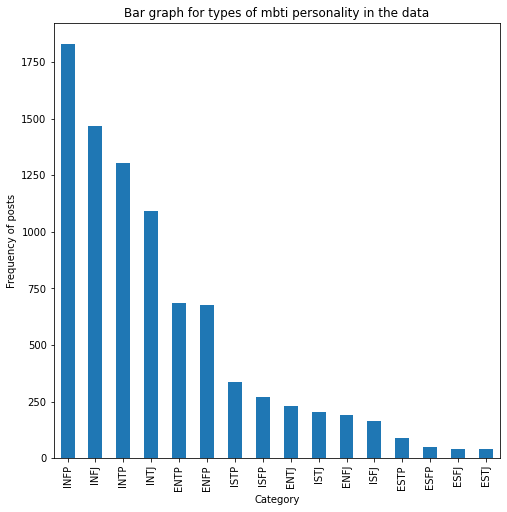

In [ ]:
#Check for null values
print("Null Values: \n")
print(data.isnull().sum())

#Plotting frequency of different categories
countCategory=data.type.value_counts()
print('\n')

print("No of posts for each mbti Personality: \n")
print(countCategory)

#Frequency vs label graphs
#Bar Graph
print(countCategory.plot(kind='bar',figsize=(8,8),xlabel='Category',ylabel='Frequency of posts', title='Bar graph for types of mbti personality in the data'))
print("\n")
#pie graph
graph.pie(data,names='type',title='Pie graph for types of mbti personality in the data', height=600, width=600)

AxesSubplot(0.125,0.125;0.775x0.755)


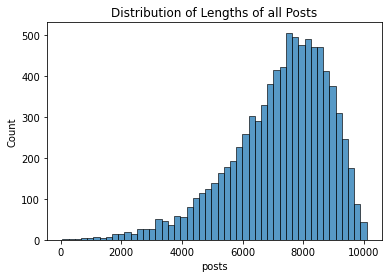

In [ ]:
#Plot to show the distribution of Lengths of all Posts
df= data["posts"].apply(len)
graph=sns.histplot(df)
graph.set_title("Distribution of Lengths of all Posts")
print(graph)

In [ ]:
#Helper function to create a list for type indicators 
def helper(ls, ch1, Type, ind):
  i=0
  for row in Type:
    if row[ind]==ch1:
      ls[i]=1
    else :
      ls[i]=0
    i= i+1
  return ls

'''This function takes dataset as input 
   It adds 4 columns(dimnesions) for 4 type indicators(personality traits)'''
#function to add columns for 4 type indicators
def Add_Type_Indicators(data):
  IE = np.zeros(data.shape[0])
  NS = np.zeros(data.shape[0])
  TF = np.zeros(data.shape[0])
  JP = np.zeros(data.shape[0])

  Type= list(data["type"])

  IE= helper(IE, 'I', Type, 0)
  NS= helper(NS, 'N', Type, 1)
  TF= helper(TF, 'T', Type, 2)
  JP= helper(JP, 'J', Type, 3)
  

  data.insert(2, "IE", IE, True)
  data.insert(3, "NS", NS, True)
  data.insert(4, "TF", TF, True)
  data.insert(5, "JP", JP, True)

data_copy=data.copy(deep=True)
Add_Type_Indicators(data_copy)


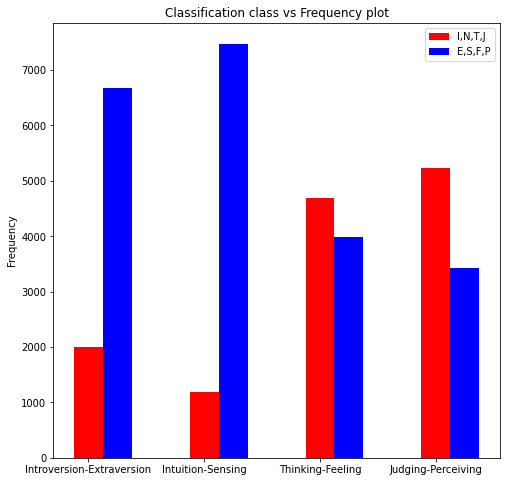

In [ ]:
# Plotting Classification class vs Frequency plot for IE, NS, TF, JP

I,N,T,J=data_copy['IE'].value_counts()[0],data_copy['NS'].value_counts()[0],data_copy['TF'].value_counts()[0],data_copy['JP'].value_counts()[0]
E,S,F,P=data_copy['IE'].value_counts()[1],data_copy['NS'].value_counts()[1],data_copy['TF'].value_counts()[1],data_copy['JP'].value_counts()[1]

plt.figure(figsize=(8,8))

coordinates=np.array(range(0,4))*2
plt.bar(coordinates-0.25,(I,N,T,J),0.5,label="I,N,T,J",color='red',tick_label=['Introversion-Extraversion','Intuition-Sensing','Thinking-Feeling','Judging-Perceiving'])
plt.bar(coordinates+0.25,(E,S,F,P),0.5,label="E,S,F,P",color='blue')

plt.legend()
plt.title('Classification class vs Frequency plot')
plt.ylabel('Frequency')
plt.show()

Correlation Matrix:
           IE        NS        TF        JP
IE  1.000000 -0.045899 -0.069573  0.161939
NS -0.045899  1.000000 -0.080954  0.014922
TF -0.069573 -0.080954  1.000000 -0.004673
JP  0.161939  0.014922 -0.004673  1.000000

HeatMap Visual:

AxesSubplot(0.125,0.125;0.62x0.755)


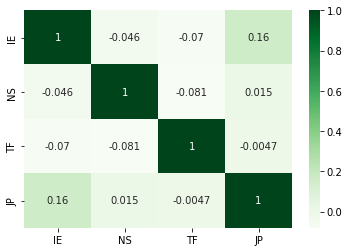

In [ ]:
#Correlation matrix and Heatmap Visuals

columns=['IE','NS','TF','JP']
matrix=data_copy[columns].corr()

print('Correlation Matrix:\n',matrix)
print('\nHeatMap Visual:\n')
print(sns.heatmap(matrix,annot=True,cmap='Greens'))

In [ ]:
data_copy_1=data_copy.copy(deep=True)

#Pre-Processing:

In [ ]:
data_copy=data_copy_1.copy(deep=True)
#Pre-Processing

#converting all text/posts to lower case
data_copy["posts"] = data_copy["posts"].str.lower()

'''This function takes a list of texual data as input.
   It performs pre-processing and natural language processing on the data.
   It returns the processed textual data list as output.'''

#remove url links
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  pattern = re.compile(r'https?://[a-zA-Z0-9./-]*/[a-zA-Z0-9?=_.]*[_0-9.a-zA-Z/-]*')
  post_temp= re.sub(pattern, ' ', post_temp)
  data_copy._set_value(i, 'posts',post_temp)
  
  pattern2=re.compile(r'https?://[a-zA-Z0-9./-]*')
  post_temp=data_copy._get_value(i, 'posts')
  post_temp= re.sub(pattern, ' ', post_temp)
  data_copy._set_value(i, 'posts',post_temp)

#removing special characters and numbers from texts.
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  pattern = re.compile('\W+')
  post_temp= re.sub(pattern, ' ', post_temp)
  pattern = re.compile(r'[0-9]')
  post_temp= re.sub(pattern, ' ', post_temp)
  pattern = re.compile(r'[_+]')
  post_temp= re.sub(pattern, ' ', post_temp)
  data_copy._set_value(i, 'posts',post_temp)

#removing extra spaces from texts.
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  pattern = re.compile('\s+')
  post_temp= re.sub(pattern, ' ', post_temp)
  data_copy._set_value(i, 'posts', post_temp)

#remove stop words
remove_words = stopwords.words("english")
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  post_temp=" ".join([w for w in post_temp.split(' ') if w not in remove_words])
  data_copy._set_value(i, 'posts', post_temp)

#remove mbti personality words from text
mbti_words =  ['infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp', 'isfp', 'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj']
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  post_temp=" ".join([w for w in post_temp.split(' ') if w not in mbti_words])
  data_copy._set_value(i, 'posts', post_temp)

#Lemmatization (grouping similar words)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
for i in range(data_copy.shape[0]):
  post_temp=data_copy._get_value(i, 'posts')
  post_temp=" ".join([lemmatizer.lemmatize(w) for w in post_temp.split(' ')])
  data_copy._set_value(i, 'posts', post_temp)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#data before preprocessing 
print("Data (post 2) before preprocessing :", data.iloc[2,1], "\n")
#data after preprocessing
print("Data (post 2) after preprocessing :", data_copy.iloc[2,1], "\n")

Data (post 2) before preprocessing : 'Good one  _____   https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes.   Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your own thoughts, and your mind just wanders in circles. Feels truly terrible. ...|||Have you noticed how peculiar vegetation can be? All you have to do is look down at the grass: dozens of different plant species there.    And now imagine that hundreds of years later (when/if soil...|||The Smiths – Never Had No One Ever|||I often find myself spotting faces on marble tiles/wood.|||This 5 year-old sentence is an incredibly accurate and beautiful description.|||I haven'

In [ ]:
del data_copy['type']

#Feature Selection:

In [ ]:
#Finding features using CountVectorizer by converting the posts into matrix of word count
post_list=[]
for i,j in data_copy.posts.iteritems():
  post_list.append(j)

vector=CountVectorizer(stop_words='english',max_features=1500)
features=vector.fit_transform(post_list)
# print(finalfeatures.shape)

#tf-idf to weigh the importance of words(features) across all posts and select more relevent features
transform = TfidfTransformer()
finalfeatures =  transform.fit_transform(features).toarray()

In [ ]:
print(finalfeatures.shape)

(8675, 1500)


In [ ]:
X_data=finalfeatures
Y_data= data_copy.iloc[:,1:5]

In [ ]:
X_train_IE, X_test_IE, Y_train_IE, Y_test_IE = train_test_split(X_data, Y_data['IE'], test_size=0.2, random_state=123,stratify=Y_data)
X_train_NS, X_test_NS, Y_train_NS, Y_test_NS = train_test_split(X_data, Y_data['NS'], test_size=0.2, random_state=123,stratify=Y_data)
X_train_TF, X_test_TF, Y_train_TF, Y_test_TF = train_test_split(X_data, Y_data['TF'], test_size=0.2, random_state=123,stratify=Y_data)
X_train_JP, X_test_JP, Y_train_JP, Y_test_JP = train_test_split(X_data, Y_data['JP'], test_size=0.2, random_state=123,stratify=Y_data)


#Models analysis and Methodology:

In [ ]:
#Function to predict labels for X_test of the given model
'''This function takes 4 GridSearchCV model as input.
  It fits all 4 models with thier resoective training data.
  It fincs the best estimator of GridSearchCV and uses 
  it to return predicted values of 4 test sets'''
def predict(model1, model2, model3, model4):
  #IE prediction
  ypredIE=model1.fit(X_train_IE,Y_train_IE).best_estimator_.predict(X_test_IE)
  #NS prediction
  ypredNS=model2.fit(X_train_NS,Y_train_NS).best_estimator_.predict(X_test_NS)
  #TF prediction
  ypredTF=model3.fit(X_train_TF,Y_train_TF).best_estimator_.predict(X_test_TF)
  #JP prediction
  ypredJP=model4.fit(X_train_JP,Y_train_JP).best_estimator_.predict(X_test_JP)

  return ypredIE, ypredNS, ypredTF, ypredJP


#Function to print Classification Report of the given model
'''This function takes 4 predicted output datasets as input.
   It computes classfication report: accuracy, recall, f1-score.
   It prints classification reports for all 4 predictions (models). '''
def print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP):
  #Classification Report for Introversion(I) / Extroversion(E)
  print("Classification Report for Introversion(I) / Extroversion(E): \n ")
  print(classification_report(Y_test_IE, ypredIE))
  accuracyIE=accuracy_score(Y_test_IE,ypredIE)
  print("Accuracy for Introversion(I) / Extroversion(E): ",accuracyIE, "\n")
  print("\n")

  #Classification Report for Intuition(N) / Sensing(S)
  print("Classification Report for Intuition(N) / Sensing(S): \n ")
  print(classification_report(Y_test_NS, ypredNS))
  accuracyNS=accuracy_score(Y_test_NS,ypredNS)
  print("Accuracy for Intuition(N) / Sensing(S): ", accuracyNS, "\n")
  print("\n")

  #Classification Report for Thinking(T) / Feeling(F)
  print("Classification Report for Thinking(T) / Feeling(F): \n ")
  print(classification_report(Y_test_TF, ypredTF))
  accuracyTF=accuracy_score(Y_test_TF,ypredTF)
  print("Accuracy for Thinking(T) / Feeling(F): ", accuracyTF, "\n")
  print("\n")

  #Classification Report for Judging(J) / Perceiving(P)
  print("Classification Report for Judging(J) / Perceiving(P): \n ")
  print(classification_report(Y_test_JP, ypredJP))
  accuracyJP=accuracy_score(Y_test_JP,ypredJP)
  print("Accuracy for Judging(J) / Perceiving(P): ",accuracyJP, "\n")
  print("\n")


#Function to print Confusion matrix for the given model
'''This function takes 4 predicted output datasets as input.
   It computes confusion matrix.
   It prints confusion matrix for all 4 predictions (models). '''
def print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP):
  #Confusion matrix for Introversion(I) / Extroversion(E):
  plt.figure()
  cm = metrics.confusion_matrix(Y_test_IE, ypredIE)
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, cmap = 'Blues_r');
  plt.ylabel('Y_test_IE');
  plt.xlabel('ypredIE');
  plt.title("Confusion matrix for Introversion(I) / Extroversion(E): ", size = 17);
  plt.show()

  #Confusion matrix for Intuition(N) / Sensing(S):
  plt.figure()
  cm = metrics.confusion_matrix(Y_test_NS, ypredNS)
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, cmap = 'Greens_r');
  plt.ylabel('Y_test_NS');
  plt.xlabel('ypredNS');
  plt.title("Confusion matrix for Intuition(N) / Sensing(S): ", size = 17);
  plt.show()

  #Confusion matrix for Judging(J) / Perceiving(P): 
  plt.figure()
  cm = metrics.confusion_matrix(Y_test_TF, ypredTF)
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, cmap = 'Reds_r');
  plt.ylabel('Y_test_TF');
  plt.xlabel('ypredTF');
  plt.title("Confusion matrix for Thinking(T) / Feeling(F): ", size = 17);
  plt.show()

  #onfusion matrix for Judging(J) / Perceiving(P):
  plt.figure()
  cm = metrics.confusion_matrix(Y_test_JP, ypredJP)
  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, cmap = 'Purples_r');
  plt.ylabel('Y_test_JP');
  plt.xlabel('ypredJP');
  plt.title("Confusion matrix for Judging(J) / Perceiving(P): ", size = 17);
  plt.show()


#Function to print roc_auc_curve for the given model
'''This function takes 4 predicted probabilitie datasets as input.
   It plots ROC Curve for all 4 predictions (models). '''
def print_roc_auc_curve(probIE, probNS, probTF, probJP):
  
  fp_IE, tp_IE, val = roc_curve(Y_test_IE, probIE[:,1])
  fp_NS, tp_NS, val = roc_curve(Y_test_NS, probNS[:,1])
  fp_TF, tp_TF, val = roc_curve(Y_test_TF, probTF[:,1])
  fp_JP, tp_JP, val = roc_curve(Y_test_JP, probJP[:,1])

  plt.figure()
  plt.plot(fp_IE, tp_IE, linestyle='--', color='red', label='Introversion(I) / Extroversion(E)')
  plt.plot(fp_NS, tp_NS, linestyle='--', color='blue', label='Intuition(N) / Sensing(S)')
  plt.plot(fp_TF, tp_TF, linestyle='--', color='pink', label='Thinking(T) / Feeling(F)')
  plt.plot(fp_JP, tp_JP, linestyle='--', color='green', label='Judging(J) / Perceiving(P)')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='best')
  plt.show()

# Naive Bayes Model

In [ ]:
#Naive Bayes Model
naivegb=GaussianNB()
#Apply stratified cross validation
grid1=GridSearchCV(naivegb,{},cv=5)
grid2=GridSearchCV(naivegb,{},cv=5)
grid3=GridSearchCV(naivegb,{},cv=5)
grid4=GridSearchCV(naivegb,{},cv=5)
#prediction
ypredIE, ypredNS, ypredTF, ypredJP= predict(grid1, grid2, grid3, grid4)
#Print classificatio report for all four dimensions
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.38      0.62      0.47       401
         1.0       0.86      0.70      0.77      1334

    accuracy                           0.68      1735
   macro avg       0.62      0.66      0.62      1735
weighted avg       0.75      0.68      0.70      1735

Accuracy for Introversion(I) / Extroversion(E):  0.6812680115273775 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.29      0.54      0.38       240
         1.0       0.91      0.79      0.85      1495

    accuracy                           0.75      1735
   macro avg       0.60      0.66      0.61      1735
weighted avg       0.83      0.75      0.78      1735

Accuracy for Intuition(N) / Sensing(S):  0.7521613832853026 



Classification Report for Thinking(T) / Feeling(F): 
 
              precision    recall  

<Figure size 432x288 with 0 Axes>

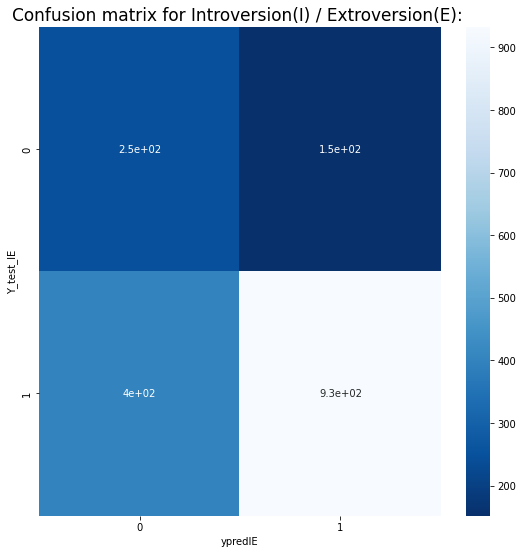

<Figure size 432x288 with 0 Axes>

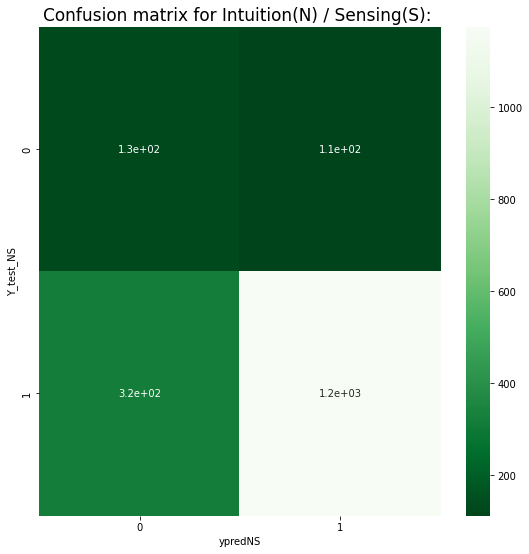

<Figure size 432x288 with 0 Axes>

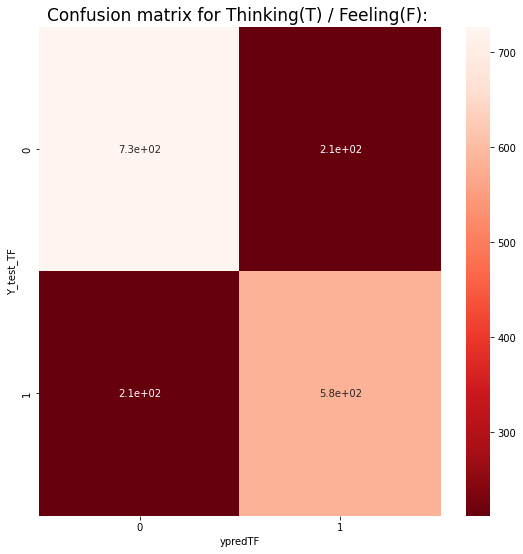

<Figure size 432x288 with 0 Axes>

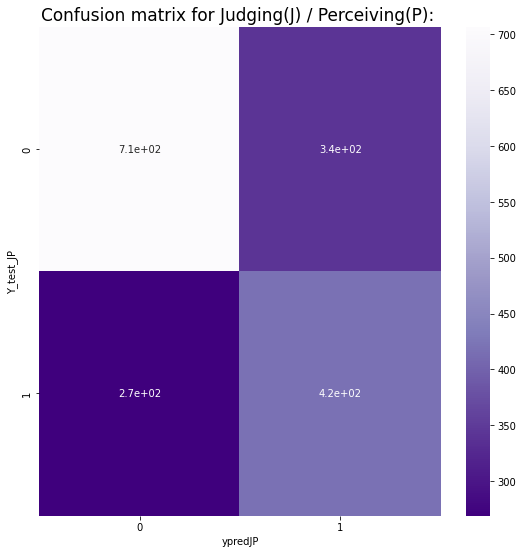

In [ ]:
#print confusion matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

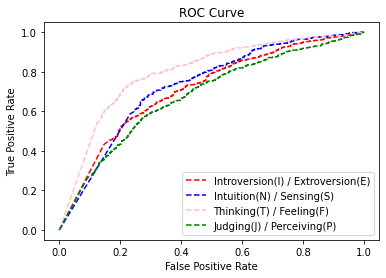

In [ ]:
#plot ROC Curve
print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF),grid4.best_estimator_.predict_proba(X_test_JP))

#Logistic regression

In [ ]:
#Logistic Regression model
log =LogisticRegression(max_iter=500)
#Apply stratified cross validation
grid1= GridSearchCV(log,{},cv=5)
grid2= GridSearchCV(log,{},cv=5)
grid3= GridSearchCV(log,{},cv=5)
grid4= GridSearchCV(log,{},cv=5)
#prediction
ypredIE, ypredNS, ypredTF, ypredJP= predict(grid1, grid2, grid3, grid4)
#Print classificatio report for all four dimensions
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.76      0.27      0.40       401
         1.0       0.82      0.98      0.89      1334

    accuracy                           0.81      1735
   macro avg       0.79      0.62      0.64      1735
weighted avg       0.80      0.81      0.77      1735

Accuracy for Introversion(I) / Extroversion(E):  0.8115273775216139 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.78      0.06      0.11       240
         1.0       0.87      1.00      0.93      1495

    accuracy                           0.87      1735
   macro avg       0.82      0.53      0.52      1735
weighted avg       0.86      0.87      0.81      1735

Accuracy for Intuition(N) / Sensing(S):  0.8674351585014409 



Classification Report for Thinking(T) / Feeling(F): 
 
              precision    recall  

<Figure size 432x288 with 0 Axes>

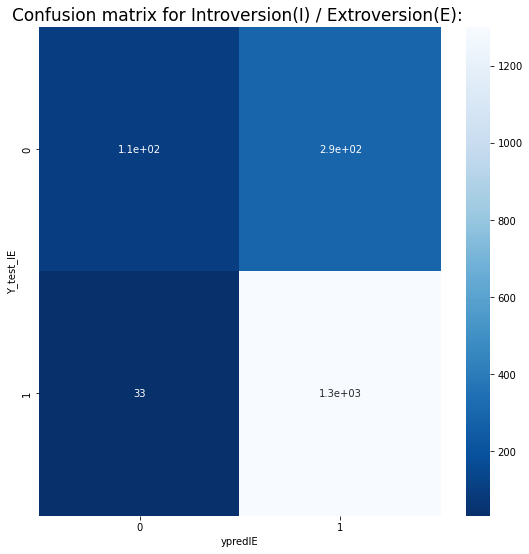

<Figure size 432x288 with 0 Axes>

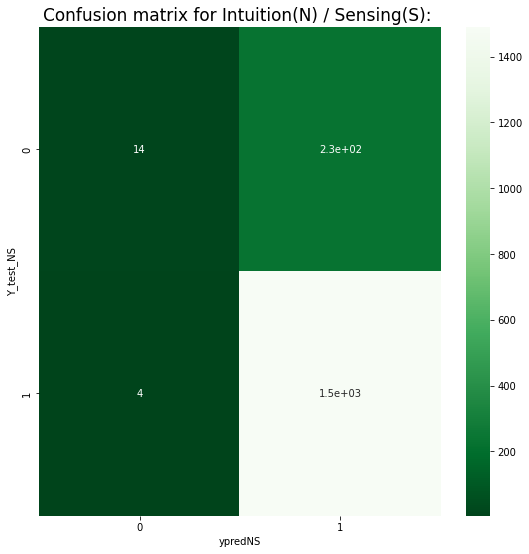

<Figure size 432x288 with 0 Axes>

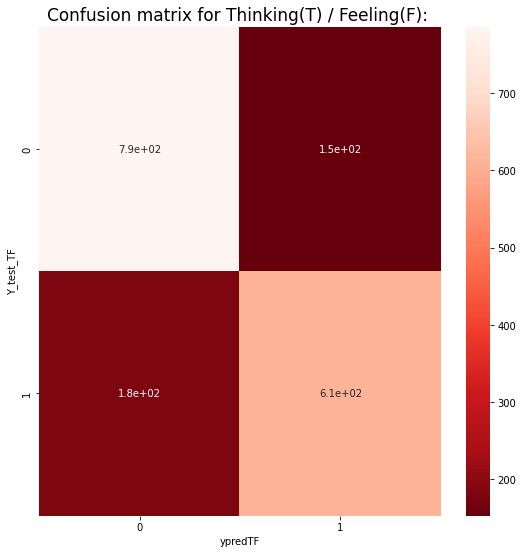

<Figure size 432x288 with 0 Axes>

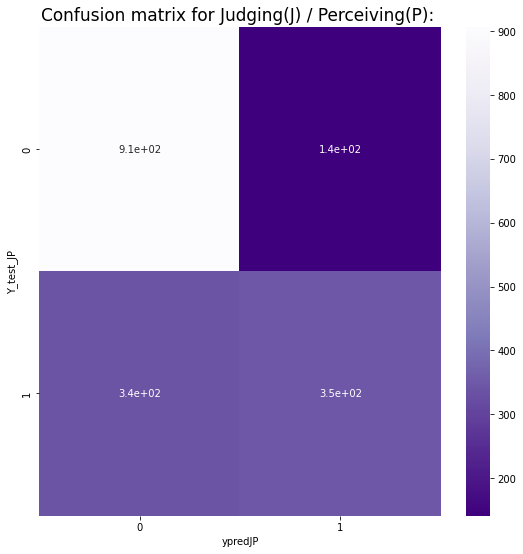

In [ ]:
#Plot confusion matix for all four dimensions
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

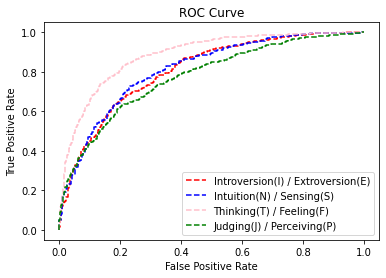

In [ ]:
#Plot ROC curve
print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF),grid4.best_estimator_.predict_proba(X_test_JP))

#Random Forest

###Selection of best value of hyperparameter max_depth to avoid overfitting.

In [ ]:
'''Below we perform hyperparameter tuning of Random Forest Classifier to avoid overfitting
   or underfitting of the model. '''

def depth_accuracy(X_train, Y_train, X_test, Y_test):
  depths = [4, 5, 6, 7, 9, 10, 11, 13, 15, 20]
  accuracies_test = list() 
  accuracies_train = list() 

  for x in depths:
   model_dt = RandomForestClassifier(max_depth=x, random_state=123)
   model_dt.fit(X_train,Y_train)
   predictions = model_dt.predict(X_test)
   acc=accuracy_score(Y_test, predictions)
   accuracies_test.append(acc)
   predictions = model_dt.predict(X_train)
   acc=accuracy_score(Y_train, predictions)
   accuracies_train.append(acc)

  #plotting
  plt.plot(depths, accuracies_test, marker='o', color='red', label='test')
  plt.plot(depths, accuracies_train, marker='o', color='green', label='train')
  plt.xlabel('Depth values')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title("Accuracy vs Depth Graph")


<Figure size 432x288 with 0 Axes>

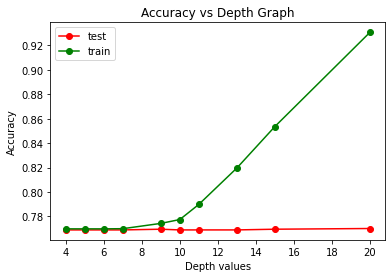

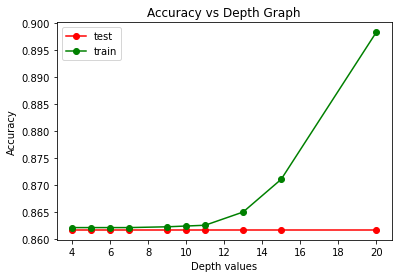

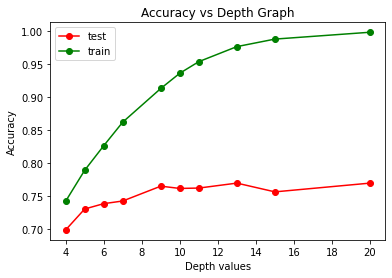

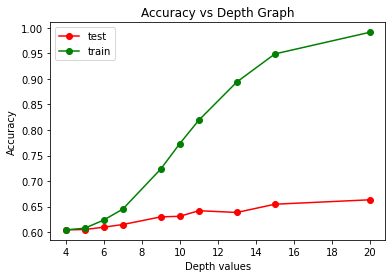

<Figure size 432x288 with 0 Axes>

In [ ]:
'''Plot depth vs accuracy graphs to find the best-tuned value of max_depth'''
depth_accuracy(X_train_IE, Y_train_IE, X_test_IE, Y_test_IE)
plt.figure()
depth_accuracy(X_train_NS, Y_train_NS, X_test_NS, Y_test_NS)
plt.figure()
depth_accuracy(X_train_TF, Y_train_TF, X_test_TF, Y_test_TF)
plt.figure()
depth_accuracy(X_train_JP, Y_train_JP, X_test_JP, Y_test_JP)
plt.figure()

In [ ]:
'''Predictions using Random Forest Classifier'''
#IE prediction
Random_F1 = RandomForestClassifier(max_depth=9, min_samples_split=10, random_state=123)
grid1=GridSearchCV(Random_F1,{},cv=5)
ypredIE= grid1.fit(X_train_IE,Y_train_IE).best_estimator_.predict(X_test_IE)

#NS prediction
Random_F2 = RandomForestClassifier(max_depth=9, min_samples_split=10, random_state=123)
grid2=GridSearchCV(Random_F2,{},cv=5)
ypredNS= grid2.fit(X_train_NS,Y_train_NS).best_estimator_.predict(X_test_NS)

#TF prediction
Random_F3 = RandomForestClassifier(max_depth=5, min_samples_split=10, random_state=123)
grid3=GridSearchCV(Random_F3,{},cv=5)
ypredTF= grid3.fit(X_train_TF,Y_train_TF).best_estimator_.predict(X_test_TF)

#JP prediction
Random_F4 = RandomForestClassifier(max_depth=6, min_samples_split=10, random_state=123)
grid4=GridSearchCV(Random_F4,{},cv=5)
ypredJP= grid4.fit(X_train_JP,Y_train_JP).best_estimator_.predict(X_test_JP)

#Print classificatio report for all four axis
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)


Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       401
         1.0       0.77      1.00      0.87      1334

    accuracy                           0.77      1735
   macro avg       0.38      0.50      0.43      1735
weighted avg       0.59      0.77      0.67      1735

Accuracy for Introversion(I) / Extroversion(E):  0.7688760806916427 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       240
         1.0       0.86      1.00      0.93      1495

    accuracy                           0.86      1735
   macro avg       0.43      0.50      0.46      1735
weighted avg       0.74      0.86      0.80      1735

Accuracy for Intuition(N) / Sensing(S):  0.861671469740634 



Classification Report for Thinking(T) / Feeling(F): 
 
              precision    recall  f

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

<Figure size 432x288 with 0 Axes>

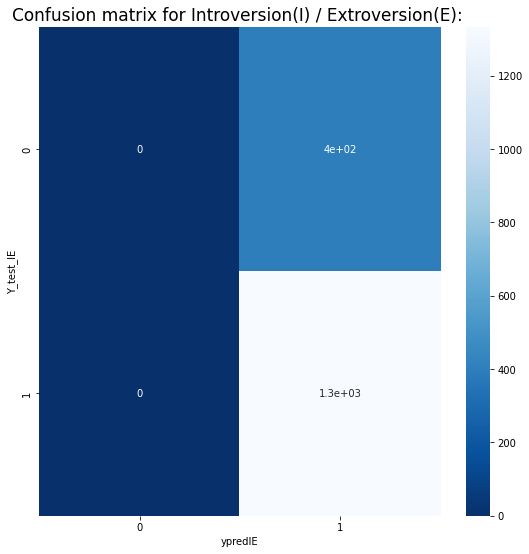

<Figure size 432x288 with 0 Axes>

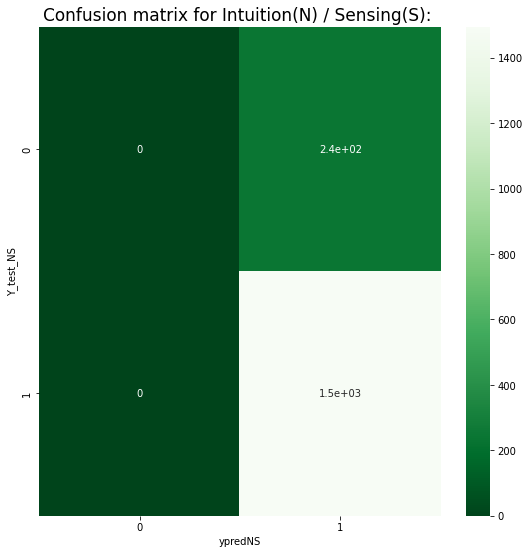

<Figure size 432x288 with 0 Axes>

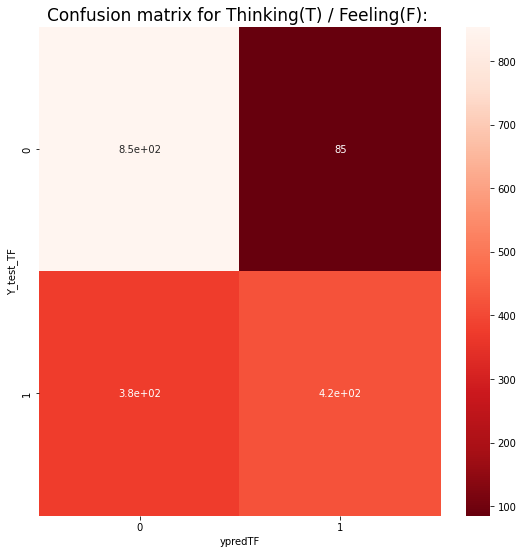

<Figure size 432x288 with 0 Axes>

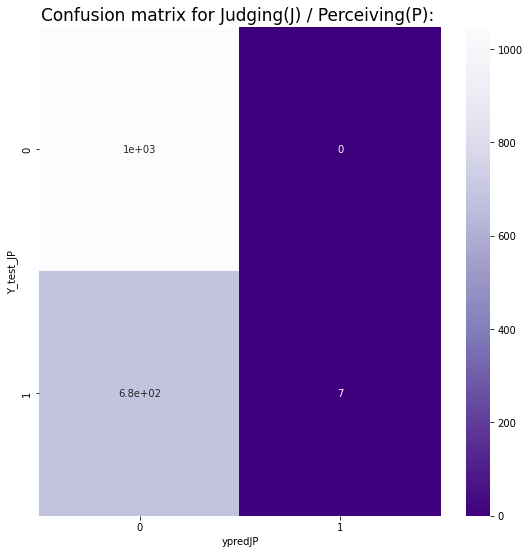

In [ ]:
#Plot confusion matrix for all 4 dimnesions
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

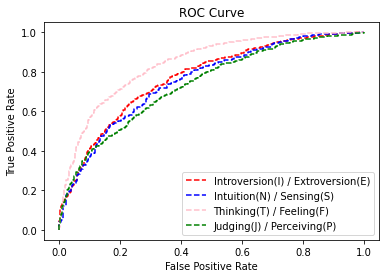

In [ ]:
#Plot ROC curve for all 4 dimnesions
print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF), grid4.best_estimator_.predict_proba(X_test_JP))

# KNN Classifier

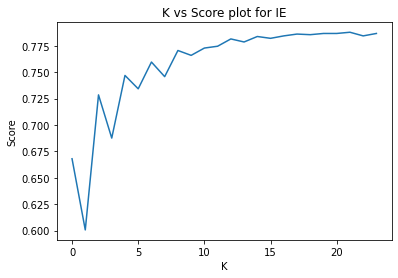

Maximum Accuracy of 0.7878962536023055 at k=22


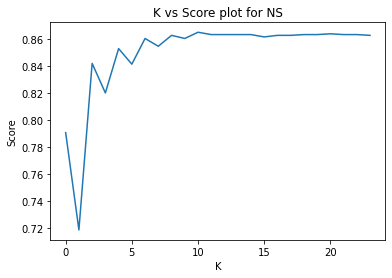

Maximum Accuracy of 0.8651296829971181 at k=11


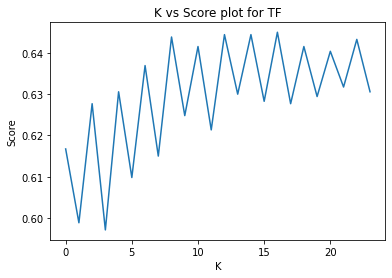

Maximum Accuracy of 0.6449567723342939 at k=17


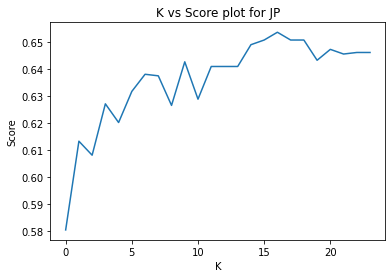

Maximum Accuracy of 0.6449567723342939 at k=17


In [ ]:
#K-Nearest Neighbor Model

'''Below we find the best value of K for our model.
   Analysis of accuracy vs K graph gives us the best value of K
   Analysis of accuracy vs K graph are plotted.'''
def plot_graph(val,xlab,ylab,title):
  plt.figure()
  plt.plot(val)
  plt.ylabel(ylab)
  plt.xlabel(xlab);
  plt.title(title)
  plt.show()

#IE prediction
k1_score=[]
for i in range(1,25):
  k1=KNeighborsClassifier(n_neighbors=i)
  k1.fit(X_train_IE,Y_train_IE)
  k1_score.append(k1.score(X_test_IE,Y_test_IE))

df1=pd.DataFrame(k1_score,columns=['IE'])
plot_graph(k1_score,'K','Score','K vs Score plot for IE')
print(f'Maximum Accuracy of {df1.max()[0]} at k={df1.idxmax()[0]+1}')

#NS prediction
k2_score=[]
for i in range(1,25):
  k2=KNeighborsClassifier(n_neighbors=i)
  k2.fit(X_train_NS,Y_train_NS)
  k2_score.append(k2.score(X_test_NS,Y_test_NS))

df2=pd.DataFrame(k2_score,columns=['NS'])
plot_graph(k2_score,'K','Score','K vs Score plot for NS')
print(f'Maximum Accuracy of {df2.max()[0]} at k={df2.idxmax()[0]+1}')

#TF prediction
k3_score=[]
for i in range(1,25):
  k3=KNeighborsClassifier(n_neighbors=i)
  k3.fit(X_train_TF,Y_train_TF)
  k3_score.append(k3.score(X_test_TF,Y_test_TF))

df3=pd.DataFrame(k3_score,columns=['TF'])
plot_graph(k3_score,'K','Score','K vs Score plot for TF')
print(f'Maximum Accuracy of {df3.max()[0]} at k={df3.idxmax()[0]+1}')

#JP prediction
k4_score=[]
for i in range(1,25):
  k4=KNeighborsClassifier(n_neighbors=i)
  k4.fit(X_train_JP,Y_train_JP)
  k4_score.append(k4.score(X_test_JP,Y_test_JP))

df4=pd.DataFrame(k3_score,columns=['JP'])
plot_graph(k4_score,'K','Score','K vs Score plot for JP')
print(f'Maximum Accuracy of {df4.max()[0]} at k={df4.idxmax()[0]+1}')


In [ ]:
kbest=KNeighborsClassifier(n_neighbors=df1.idxmax()[0]+1)
ypredIE=kbest.fit(X_train_IE,Y_train_IE).predict(X_test_IE)
probIE= kbest.predict_proba(X_test_IE)

kbest=KNeighborsClassifier(n_neighbors=df2.idxmax()[0]+1)
ypredNS=kbest.fit(X_train_NS,Y_train_NS).predict(X_test_NS)
probNS= kbest.predict_proba(X_test_NS)

kbest=KNeighborsClassifier(n_neighbors=df3.idxmax()[0]+1)
ypredTF=kbest.fit(X_train_TF,Y_train_TF).predict(X_test_TF)
probTF= kbest.predict_proba(X_test_TF)

kbest=KNeighborsClassifier(n_neighbors=df4.idxmax()[0]+1)
ypredJP=kbest.fit(X_train_JP,Y_train_JP).predict(X_test_JP)
probJP= kbest.predict_proba(X_test_JP)

In [ ]:
#Print KNN Results
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.74      0.13      0.22       401
         1.0       0.79      0.99      0.88      1334

    accuracy                           0.79      1735
   macro avg       0.76      0.56      0.55      1735
weighted avg       0.78      0.79      0.72      1735

Accuracy for Introversion(I) / Extroversion(E):  0.7878962536023055 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.69      0.05      0.09       240
         1.0       0.87      1.00      0.93      1495

    accuracy                           0.87      1735
   macro avg       0.78      0.52      0.51      1735
weighted avg       0.84      0.87      0.81      1735

Accuracy for Intuition(N) / Sensing(S):  0.8651296829971181 



Classification Report for Thinking(T) / Feeling(F): 
 
              precision    recall  

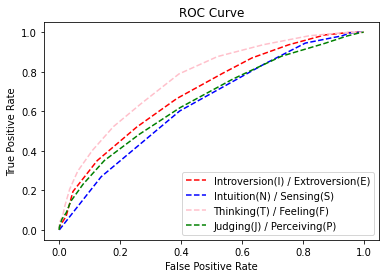

In [ ]:
#Plot ROC curve
print_roc_auc_curve(probIE, probNS, probTF, probJP)

#SGD Classifier:

In [ ]:
#SGDClassifier Model
sgd_model= SGDClassifier(loss='log') 
#Apply cross validation
grid1=GridSearchCV(sgd_model,{},cv=5)
grid2=GridSearchCV(sgd_model,{},cv=5)
grid3=GridSearchCV(sgd_model,{},cv=5)
grid4=GridSearchCV(sgd_model,{},cv=5)
#prediction
ypredIE, ypredNS, ypredTF, ypredJP= predict(grid1, grid2, grid3, grid4)
#Print classificatio report for all four axis
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.70      0.36      0.48       401
         1.0       0.83      0.95      0.89      1334

    accuracy                           0.82      1735
   macro avg       0.77      0.66      0.68      1735
weighted avg       0.80      0.82      0.79      1735

Accuracy for Introversion(I) / Extroversion(E):  0.8167146974063401 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.73      0.07      0.12       240
         1.0       0.87      1.00      0.93      1495

    accuracy                           0.87      1735
   macro avg       0.80      0.53      0.53      1735
weighted avg       0.85      0.87      0.82      1735

Accuracy for Intuition(N) / Sensing(S):  0.8674351585014409 



Classification Report for Thinking(T) / Feeling(F): 
 
              precision    recall  

<Figure size 432x288 with 0 Axes>

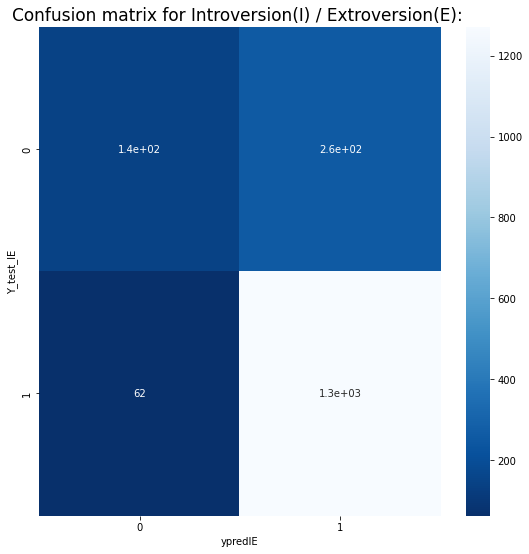

<Figure size 432x288 with 0 Axes>

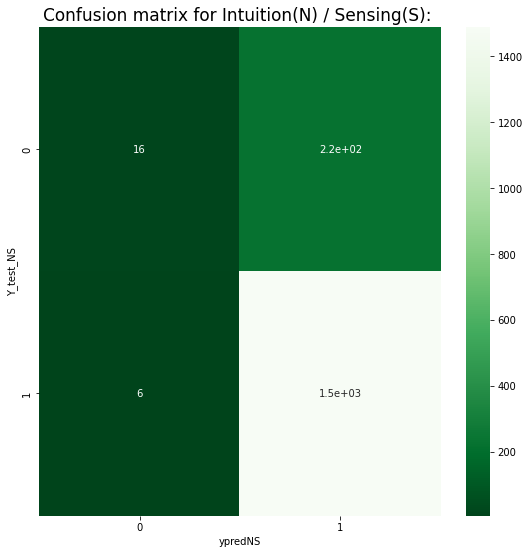

<Figure size 432x288 with 0 Axes>

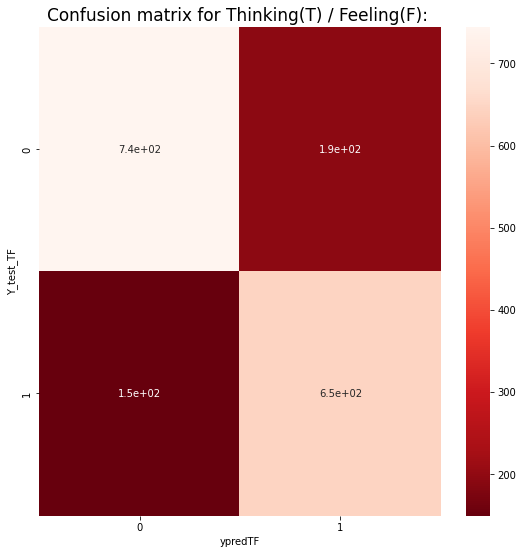

<Figure size 432x288 with 0 Axes>

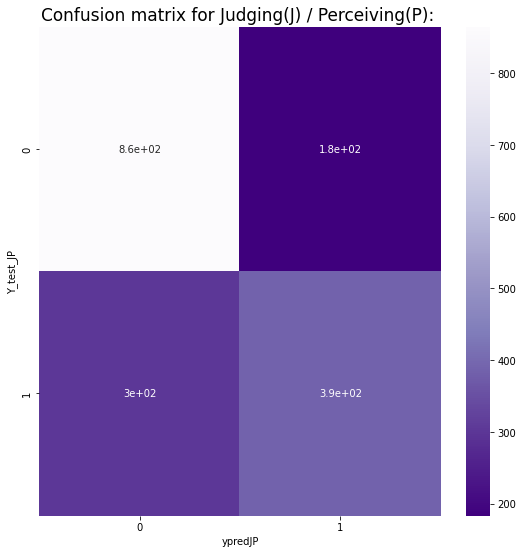

In [ ]:
#Plot Confusion Matrix
print_confusion_matrix(ypredIE, ypredNS, ypredTF, ypredJP)

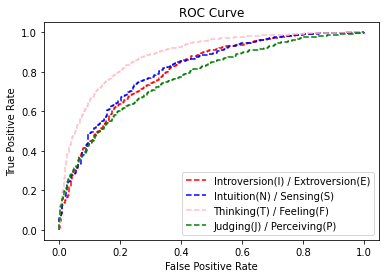

In [ ]:
#plot ROC curve
print_roc_auc_curve(grid1.best_estimator_.predict_proba(X_test_IE), grid2.best_estimator_.predict_proba(X_test_NS),
                    grid3.best_estimator_.predict_proba(X_test_TF), grid4.best_estimator_.predict_proba(X_test_JP))

# Support Vector Classification

Classification Report for Introversion(I) / Extroversion(E): 
 
              precision    recall  f1-score   support

         0.0       0.77      0.21      0.33       401
         1.0       0.80      0.98      0.88      1334

    accuracy                           0.80      1735
   macro avg       0.79      0.59      0.61      1735
weighted avg       0.80      0.80      0.76      1735

Accuracy for Introversion(I) / Extroversion(E):  0.8023054755043227 



Classification Report for Intuition(N) / Sensing(S): 
 
              precision    recall  f1-score   support

         0.0       0.79      0.05      0.09       240
         1.0       0.87      1.00      0.93      1495

    accuracy                           0.87      1735
   macro avg       0.83      0.52      0.51      1735
weighted avg       0.86      0.87      0.81      1735

Accuracy for Intuition(N) / Sensing(S):  0.8662824207492795 



Classification Report for Thinking(T) / Feeling(F): 
 
              precision    recall  

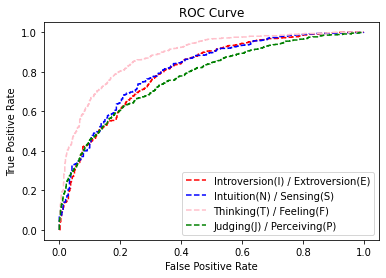

In [ ]:
#Support Vactor Machines (SVM) model

#IE prediction
svm1=SVC(random_state=123, probability=True)
svm1.fit(X_train_IE,Y_train_IE)
ypredIE=svm1.predict(X_test_IE)

#NS prediction
svm2=SVC(random_state=123, probability=True)
svm2.fit(X_train_NS,Y_train_NS)
ypredNS=svm2.predict(X_test_NS)

#TF prediction
svm3=SVC(random_state=123, probability=True)
svm3.fit(X_train_TF,Y_train_TF)
ypredTF=svm3.predict(X_test_TF)

#JP prediction
svm4=SVC(random_state=123, probability=True)
svm4.fit(X_train_JP,Y_train_JP)
ypredJP=svm4.predict(X_test_JP)

#Print classificatio report for all four axis
print_classification_report(ypredIE, ypredNS, ypredTF, ypredJP)

#plot ROC curve
print_roc_auc_curve(svm1.predict_proba(X_test_IE), svm2.predict_proba(X_test_NS),
                    svm3.predict_proba(X_test_TF), svm4.predict_proba(X_test_JP))